In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [2]:
class csv_tag():
    def __init__(self, name, path, deform=None, time=None, center=None, velocity=None, nVol=None, nArea=None, cell_max=None, cell_min=None):
        self.name = name
        self.path = path
        self.deform = list() if deform is None else deform
        self.time = list() if time is None else time
        self.center = dict() if center is None else center
        self.max = dict() if cell_max is None else cell_max
        self.min = dict() if cell_min is None else cell_min
        self.velocity = dict() if velocity is None else velocity
        self.nVol = list() if nVol is None else nVol
        self.nArea = list() if nArea is None else nArea
    
    def analysis(self):
        # analysis velocity change in presentage
        init_Vol = self.nVol[0]
        pVol = []
        for i in self.nVol:
            temp_pVol = i/init_Vol
            pVol.append(temp_pVol)
        self.pVol = pVol

        D2_length = []
        for i in range(len(self.max['z'])):
            z1 = self.max['z'][i]
            z2 = self.min['z'][i]
            y1 = self.max['y'][i]
            y2 = self.min['y'][i]
            x1 = self.max['x'][i]
            x2 = self.min['x'][i]
            temp_length = math.sqrt((z1 - z2)**2 + (y1 - y2)**2 + (x1 - x2)**2)
            D2_length.append(temp_length)
        self.D2_length = D2_length

In [3]:
def float_to_str(f):
    if f == 0:
        str_out = 0
        return str_out
    else:
        if f < 0:
            sign = 'n'
        else:
            sign = ''
    f = abs(f)
    temp_float = f%1
    int_part = int(f - temp_float)
    float_part = round(f%1, 2)
    float_part = int(float_part*100)
    float_str = str(float_part)
    str_out = sign + str(int_part) + 'p' + float_str
    return str_out

In [4]:
def gene_name(axes, stiffness, coord): 
    """ 
    this function helps generate name from given cell parameters, it will take 
    axes(a float), stiffness( a float), and coord(tuble of x, y, and z), and make it a
    string to help locate the address of the folder contains cell information.  
    
    input:
        axes(float)
        stiffness(float)
        coord (tuple/list): (x, y, z)

    output:
        name(str): axes_stiffness_x_y_z use 'p' for dot and 'n' for negative
    """
    axes_str = float_to_str(axes)
    if axes_str[-1] == '0' and len(axes_str) == 4:
        axes_str = axes_str[:-1]
    stif_str = str(stiffness)
    if coord != None:
        x = float_to_str(coord[0])
        y = float_to_str(coord[1])
        z = float_to_str(coord[2])
        name = "a{}_s{}_{}_{}_{}".format(axes_str, stif_str, x, y, z)
    else:
        name = "a{}_s{}".format(axes_str, stif_str)
    return name

In [5]:
def gene_csv (path, name):
    """ generate a csv class for future use
    take the path, which contains the filename (metadata.csv)
    and output the class
    
    input:
    path(str): the address to the """
    count = 0
    name = name
    filename = "0.metadata.csv"
    for i in name:
        if i == "_":
            count += 1 
    if count == 0:
        raise ValueError('Please input information in a correct formate')
    elif count == 1:
        path = path + "vis_cell_" + name + ".iter/" + filename
    elif count == 4:
        path = path + "vis_" + name + ".iter/" + filename
    csv = csv_tag(name, path)
    return csv

In [6]:
def read_csv_metadata(axes, stiffness, coord=None):
    path = 'OPF_analysis/'
    name = gene_name(axes, stiffness, coord)
    csv = gene_csv(path, name)
    data = pd.read_csv('{}'.format(csv.path))
    data_sorted = data.sort_values('time')
    csv.time = data_sorted['time']
    csv.deform = data_sorted['taylorDeformation']
    csv.center['x'] = data_sorted['center_x']
    csv.center['y'] = data_sorted['center_y']
    csv.center['z'] = data_sorted['center_z']
    csv.max['x'] = data_sorted['max_x']
    csv.max['y'] = data_sorted['max_y']
    csv.max['z'] = data_sorted['max_z']
    csv.min['x'] = data_sorted['min_x']
    csv.min['y'] = data_sorted['min_y']
    csv.min['z'] = data_sorted['min_z']
    csv.nVol = data_sorted['normalizedVol']
    csv.nArea = data_sorted['normalizedArea']
    return csv

In [7]:
def gene_plot(csv, x_axis, y_axis, color=None):
    csv.analysis()
    func_axis = ['time', 'x', 'y', 'z', 'deformation', 'pVol', 'nArea', 'max_x', 'max_y', 'min_x', 'min_y', 'length']
    label_list = ['Time (ms)', 'X position (um)', 'Y position (um)', 'Z position (um)', 
                  'Deformation', 'pVol', 'nArea (µm^2)', 'max X (um)', 'max Y (um)', 'min X (um)', 'min Y (um)', 'length(µm)']
    for index, options in enumerate(func_axis):
        if x_axis == options:
            x_index = index
            xlabel = label_list[x_index]
        if y_axis == options:
            y_index = index
            ylabel = label_list[y_index]
    #scan the function list and determine the x,y axis to be printed

    if x_axis == 'time':
        x_data = csv.time
    elif x_axis == 'x':
        x_data = csv.center['x']
    elif x_axis == 'y':
        x_data = csv.center['y']
    elif x_axis == 'z':
        x_data = csv.center['z']
    elif x_axis == 'deformation':
        x_data = csv.deform
    elif x_axis == 'pVol':
        x_data = csv.pVol
    elif x_axis == 'nArea':
        x_data = csv.nArea
    elif x_axis == 'max_x':
        x_data = csv.max['x']
    elif x_axis == 'max_y':
        x_data = csv.max['y']
    elif x_axis == 'min_x':
        x_data = csv.min['x']
    elif x_axis == 'min_y':
        x_data = csv.min['y']
    elif x_axis == 'length':
        x_data = csv.D2_length
    
    if y_axis == 'time':
        y_data = csv.time
    elif y_axis == 'x':
        y_data = csv.center['x']
    elif y_axis == 'y':
        y_data = csv.center['y']
    elif y_axis == 'z':
        y_data = csv.center['z']
    elif y_axis == 'deformation':
        y_data = csv.deform
    elif y_axis == 'pVol':
        y_data = csv.pVol
    elif y_axis == 'nArea':
        y_data = csv.nArea
    elif y_axis == 'max_x':
        y_data = csv.max['x']
    elif y_axis == 'max_y':
        y_data = csv.max['y']
    elif y_axis == 'min_x':
        y_data = csv.min['x']
    elif y_axis == 'min_y':
        y_data = csv.min['y']
    elif y_axis == 'length':
        y_data = csv.D2_length
    
    color = None if color is None else color

    plt.plot(x_data, y_data, label=csv.name, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [8]:
def determine_trajectory(x, y):
    for j, k in enumerate(x):
        if k > -1:
            if y[j] > -10 and y[j] < 0:
                return 0
            elif y[j] > -80 and y[j] < -60:
                return 1
            elif y[j] < -80:
                return 2
            elif y[j] > 0:
                return 4
            else:
                return 3

bp3: `x = -130, -105, y = -53, -31`  
bp4: `x = -105, -75, y = -54, -46`  
bp5: `x = -75, -45, y = -72, -62`  
bp6: `x = -40, -10, y = -92, -82`  

### Separating streamline
bp2, `y = -16.4`  
bp3, `y = -32.8`  
bp4, `y = -50.8`  
bp5, `y = -67.7`  
bp6, `y = -86.0`  
mbp3, `y = -0.2`
mbp7, `y = -70.2`

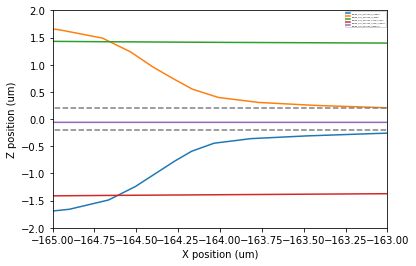

In [22]:
i = 0
j = 6
color_list=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
coord_list = [(-230, 3.5, 0), (-230, 2.47, 2.47), (-230, 0, 3.5), (-230, -2.47, 2.47), (-230, -3.5, 0), (-230, -2.47, -2.47), (-230, 0, -3.5), (-230, 2.47, -2.47)]
coord_suplist_1 = [(-230, 0, -3.5),(-230, 0, 3.5),  (-230, -2.47, 2.47), (-230, -2.47, -2.47), (-230, -3.5, 0)]
for xyz in coord_suplist_1:
    try:
        read_csv_metadata(2.95, 40, xyz)
    except:
        continue
    csv = read_csv_metadata(2.95, 40, xyz)
    cc = determine_trajectory(csv.center['x'], csv.center['y'])
    if cc == 0:
        color = 'b'
    elif cc == 1:
        color = 'y'
    elif cc ==2:
        color = 'r'
    elif cc ==3:
        color = 'g'
    elif cc ==4:
        color = 'c'
    else:
        color == 'k'
    gene_plot(csv, 'x', 'z', color_list[i])
    i += 1
    j = 2
plt.legend(prop={'size': 2})
plt.plot([-230, 230], [-0.2, -0.2], '--', color='grey')
plt.plot([-230, 230], [0.2, 0.2], '--', color='grey')
# for plot y over x at the first bifucation
plt.xlim(-165, -163)
plt.ylim(-2, 2)
plt.savefig(os.path.abspath("./OPF_analysis/full_xz_bp2_zoomin.png"), dpi=800)

# plot y over time at the second bifurcation
# plt.xlim(0.000, 0.0040)
# plt.ylim(-30, 0)
# plt.savefig(os.path.abspath("./all_cell_s5/bp2_yt_s80.png".format(a)), dpi=800)


plt.show()

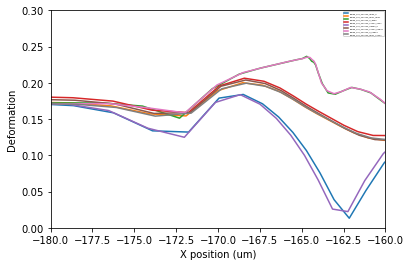

In [28]:
i = 0
color_list=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
coord_list = [(-230, 3.5, 0), (-230, 2.47, 2.47), (-230, 0, 3.5), (-230, -2.47, 2.47), (-230, -3.5, 0), (-230, -2.47, -2.47), (-230, 0, -3.5), (-230, 2.47, -2.47)]
for xyz in coord_list:
    try:
        read_csv_metadata(2.95, 40, xyz)
    except:
        continue
    csv = read_csv_metadata(2.95, 40, xyz)
    cc = determine_trajectory(csv.center['x'], csv.center['y'])
    if cc == 0:
        color = 'b'
    elif cc == 1:
        color = 'y'
    elif cc ==2:
        color = 'r'
    elif cc ==3:
        color = 'g'
    elif cc ==4:
        color = 'c'
    else:
        color == 'k'
    gene_plot(csv, 'x', 'deformation', color_list[i])
    i += 1
plt.legend(prop={'size': 2})
# plt.plot([-230, 230], [-0.2, -0.2], '--', color='grey')
# for plot y over x at the first bifucation
plt.xlim(-180, -160)
plt.ylim(0, 0.3)
plt.savefig(os.path.abspath("./OPF_analysis/temp4_deform.png"), dpi=800)

i = 0
coord = (-230, 0, 0)
color_list=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for a in [1.0, 1.5, 1.75, 2.0, 2.25, 2.5, 2.8, 2.85, 2.9, 2.95, 3.0, 3.5, 4.0, 4.5, 5.0]:
    i = 0
    for s in [2, 5, 10, 20, 40, 80, 120, 160]: 
        try:
            read_csv_metadata(a, s, coord)
        except:
            continue
        csv = read_csv_metadata(a, s, coord)
        cc = determine_trajectory(csv.center['x'], csv.center['y'])
        if cc == 0:
            color = 'b'
        elif cc ==1:
            color = 'y'
        elif cc ==2:
            color = 'r'
        elif cc ==3:
            color = 'g'
        else:
            color = 'k'
        gene_plot(csv, 'x', 'y', color_list[i])
        i += 1
        plt.legend(prop={'size': 2})
        plt.plot([-230, 230], [-0.2, -0.2], '--', color='grey')
        str_a = float_to_str(a)
        str_s = float_to_str(s)
        plt.title("a{}_s2_to_s160".format(str_a, str_s))
    # for plot y over x at the first bifucation
    # plt.xlim(-130, -105)
    # plt.ylim(-5, 5)
    plt.savefig(os.path.abspath("./Image_and_plot/a{}_s2_to_s160.png".format(a, s)), dpi=800)
    plt.show()

i = 0
color_list=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for a in [2.8, 2.85, 2.9, 2.95, 3.0]:
    # i = 0
    for s in [5, 10, 20, 40, 80]: 
        try:
            read_csv_metadata(a, s)
        except:
            continue
        csv = read_csv_metadata(a, s)
        cc = determine_trajectory(csv.center['x'], csv.center['y'])
        if cc == 0:
            color = 'b'
        elif cc == 1:
            color = 'y'
        elif cc ==2:
            color = 'r'
        elif cc ==3:
            color = 'g'
        else:
            color == 'k'
        gene_plot(csv, 'x', 'y', color_list[i])
    i += 1
plt.legend(prop={'size': 2})
plt.plot([-230, 230], [-16.4, -16.4], '--', color='grey')
# for plot y over x at the first bifucation
plt.xlim(-140, -133)
plt.ylim(-18, -14)
# plt.ylim(0, 0.5)
plt.savefig(os.path.abspath("./all_cell_s5/BP2_zoomin_2p75_to_3p0_RnB_yx.png"), dpi=800)

# generate dis_off vs x graph
color = iter(['--r', '--b', '--c', '--g','--y'])
tag_list = ['y1', 'y2', 'z2', 'orig']
for i, file in enumerate(filename_list):
    data = pd.read_csv(file)
    data_sorted = data.sort_values('time')
    c = next(color)
    Time, X, Y, Z, V_all, dist_off = generate_off_center(data_sorted)
    plt.plot(X[0:-1], V_all, c, label = "Coordinate: {}".format(tag_list[i]))
    plt.legend()
    plt.title("Y vs X with change of stiffness")
    plt.ylabel('Y position (um)')
    plt.xlabel('X Position (um)')
    if i == 1:
        plt.show()

# generate dis_off vs x graph
color = iter(['--r', '--b', '--y', '--c'])
for i, file in enumerate(filename_list):
    data = pd.read_csv(file)
    data_sorted = data.sort_values('time')
    c = next(color)
    Time, X, Y, Z, V_all, dist_off = generate_off_center(data_sorted)
    plt.plot(X[60:90], Y[60:90], c, label = "G: {}".format(stiffness_list[i]* 10 **-5))
    plt.legend()
    plt.title("Velocity vs X with change of stiffness")
    plt.ylabel('Velocity (um/us)')
    plt.xlabel('X Position (um)')
plt.show()

# generate Deformation vs x graph (plus ave and std)
color = iter(['--r', '--b', '--y', '--c'])
for i, file in enumerate(filename_list):
    data = pd.read_csv(file)
    Time = data['time']
    X = data['center_x']
    Y = data['center_y']
    Deformation = data['taylorDeformation']
    deform_ave = Deformation.mean() * np.ones(len(X))
    deform_std = Deformation.std() * np.ones(len(X))
    c = next(color)
    plt.plot(X, Deformation, c, label = "G: {}".format(stiffness_list[i] * 10 **-5))
    plt.plot(X, deform_ave, '--', label = 'Average')
    plt.plot(X, deform_std, '--k', label = 'Standard deviation')
    plt.ylim(0, 0.4)
    plt.legend()
    plt.title("TaylorDeformation vs position at Gs to be {}".format(stiffness_list[i] * 10 **-5))
    plt.ylabel('Deformation Index')
    plt.xlabel('X position (um)')
    plt.show()

